# SAMBA Analysis

In [18]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib as mpl
import matplotlib.pyplot as plt
from plasmapy.formulary import thermal_speed, collision_frequency
from plasmapy.particles import Particle
from astropy import units as u

In [19]:
mpl.rcParams['axes.formatter.limits'] = (-2,2)
plt.rcParams['figure.dpi'] = 300
plt.rcParams["axes.titlesize"] = 32
plt.rcParams['axes.titlepad'] = 20 
plt.rcParams["axes.labelsize"] = 24
plt.rcParams["xtick.labelsize"] = 16
plt.rcParams["ytick.labelsize"] = 16
plt.rcParams["legend.fontsize"] = 16
sb.set_theme(style="whitegrid")
palette = sb.color_palette("rainbow_r")
palette

[(1.0, 0.4291206087726087, 0.2199463578396685),
 (0.9274509803921569, 0.7829276104921029, 0.43467642176596505),
 (0.6450980392156862, 0.9741386021045102, 0.622112816721474),
 (0.3549019607843138, 0.9741386021045101, 0.7829276104921028),
 (0.0725490196078431, 0.7829276104921027, 0.9005867023006374),
 (0.2176470588235293, 0.4291206087726091, 0.9755119679804366)]

### load parameters for run

In [20]:
params = pd.read_csv("Params/params1.csv", index_col=0)
params

,0
B_0,1.000000e-03
b_neg,5.000000e+00
b_pos,5.000000e+00
d_neg,1.000000e+00
d_pos,1.000000e+00
n_0,1.000000e+21
T,1.000000e+00
R,2.500000e-01


In [21]:
grid = pd.read_csv("Params/grid.csv", index_col=0)
grid

,speed,pitch,phase
radii,,,
0.00,0.5,30,0
0.25,1.0,70,90
0.50,1.5,110,180
0.75,2.0,150,270


### load results of run

In [22]:
df = pd.read_csv("Results/100run1.csv", index_col=0)
print(len(df), " particles")
df.head()

25600  particles


,x,y,z,r,v,theta,phi,t
0,0.147492,-0.425282,0.527367,0.0,9.377686e+06,0.523599,0.000000,0.000002
1,0.248390,-0.556492,0.428921,0.0,9.377686e+06,0.523599,1.570796,0.000002
2,0.403940,-0.481600,0.606808,0.0,9.377686e+06,0.523599,3.141593,0.000002
3,0.505763,-0.319126,0.478431,0.0,9.377686e+06,0.523599,4.712389,0.000002
4,0.238891,-0.453293,0.591658,0.0,9.377686e+06,1.221730,0.000000,0.000002


### get thermal velocity and collision time

In [23]:
n = float(params.loc["n_0"]) / u.m ** 3
T = float(params.loc["T"]) * u.keV
v_thermal = thermal_speed(T, Particle("e-"))
t_collision = 1 / collision_frequency(T, n, (Particle("e-"), Particle("p+")))

/home/chiral/anaconda3/envs/pppl/lib/python3.10/site-packages/plasmapy/utils/decorators/checks.py:1390: RelativityWarning: thermal_speed is yielding a velocity that is 6.256% of the speed of light. Relativistic effects may be important.
  warnings.warn(
/home/chiral/anaconda3/envs/pppl/lib/python3.10/site-packages/plasmapy/utils/decorators/checks.py:1390: RelativityWarning: thermal_speed is yielding a velocity that is 6.258% of the speed of light. Relativistic effects may be important.
  warnings.warn(
/home/chiral/anaconda3/envs/pppl/lib/python3.10/site-packages/plasmapy/utils/decorators/checks.py:1390: RelativityWarning: V is yielding a velocity that is 6.258% of the speed of light. Relativistic effects may be important.
  warnings.warn(
/home/chiral/anaconda3/envs/pppl/lib/python3.10/site-packages/plasmapy/utils/decorators/checks.py:1390: RelativityWarning: V is yielding a velocity that is 6.256% of the speed of light. Relativistic effects may be important.
  warnings.warn(


### scale results

In [24]:
df["r / R"] = df["r"] / float(params.loc["R"])
df["v / v_thermal"] = df["v"] / v_thermal
df["pitch"] = round(df["theta"] * 180 / np.pi)
df["phase"] = round(df["phi"] * 180 / np.pi)
df["t / t_collision"] = round(df["t"] / t_collision, 2)
df.head()

,x,y,z,r,v,theta,phi,t,r / R,v / v_thermal,pitch,phase,t / t_collision
0,0.147492,-0.425282,0.527367,0.0,9.377686e+06,0.523599,0.000000,0.000002,0.0,0.5,30.0,0.0,4.0
1,0.248390,-0.556492,0.428921,0.0,9.377686e+06,0.523599,1.570796,0.000002,0.0,0.5,30.0,90.0,4.0
2,0.403940,-0.481600,0.606808,0.0,9.377686e+06,0.523599,3.141593,0.000002,0.0,0.5,30.0,180.0,4.0
3,0.505763,-0.319126,0.478431,0.0,9.377686e+06,0.523599,4.712389,0.000002,0.0,0.5,30.0,270.0,4.0
4,0.238891,-0.453293,0.591658,0.0,9.377686e+06,1.221730,0.000000,0.000002,0.0,0.5,70.0,0.0,4.0


### plot final axial positions

(-20.0, 20.0)

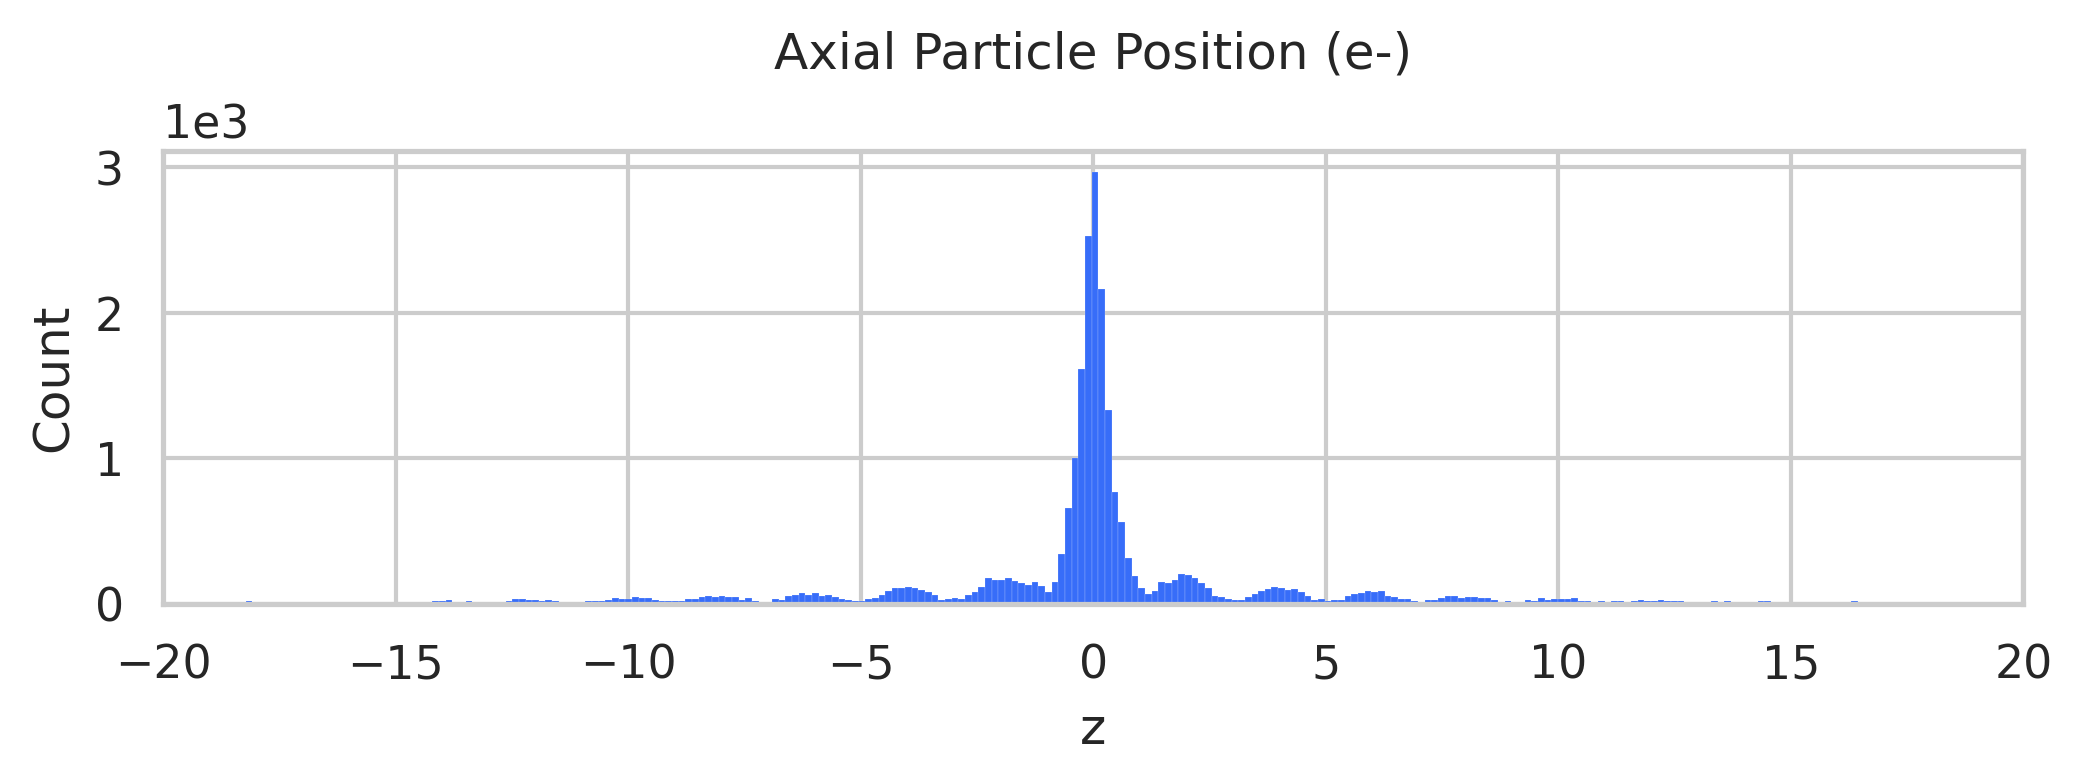

In [49]:
plt.figure(figsize=(8, 2))
sb.histplot(data=df, x="z", bins=1000, color=palette[5], alpha=1)
plt.title("Axial Particle Position (e-)")
plt.xlim((-20, 20))

### explore influence of parameters

(-20.0, 20.0)

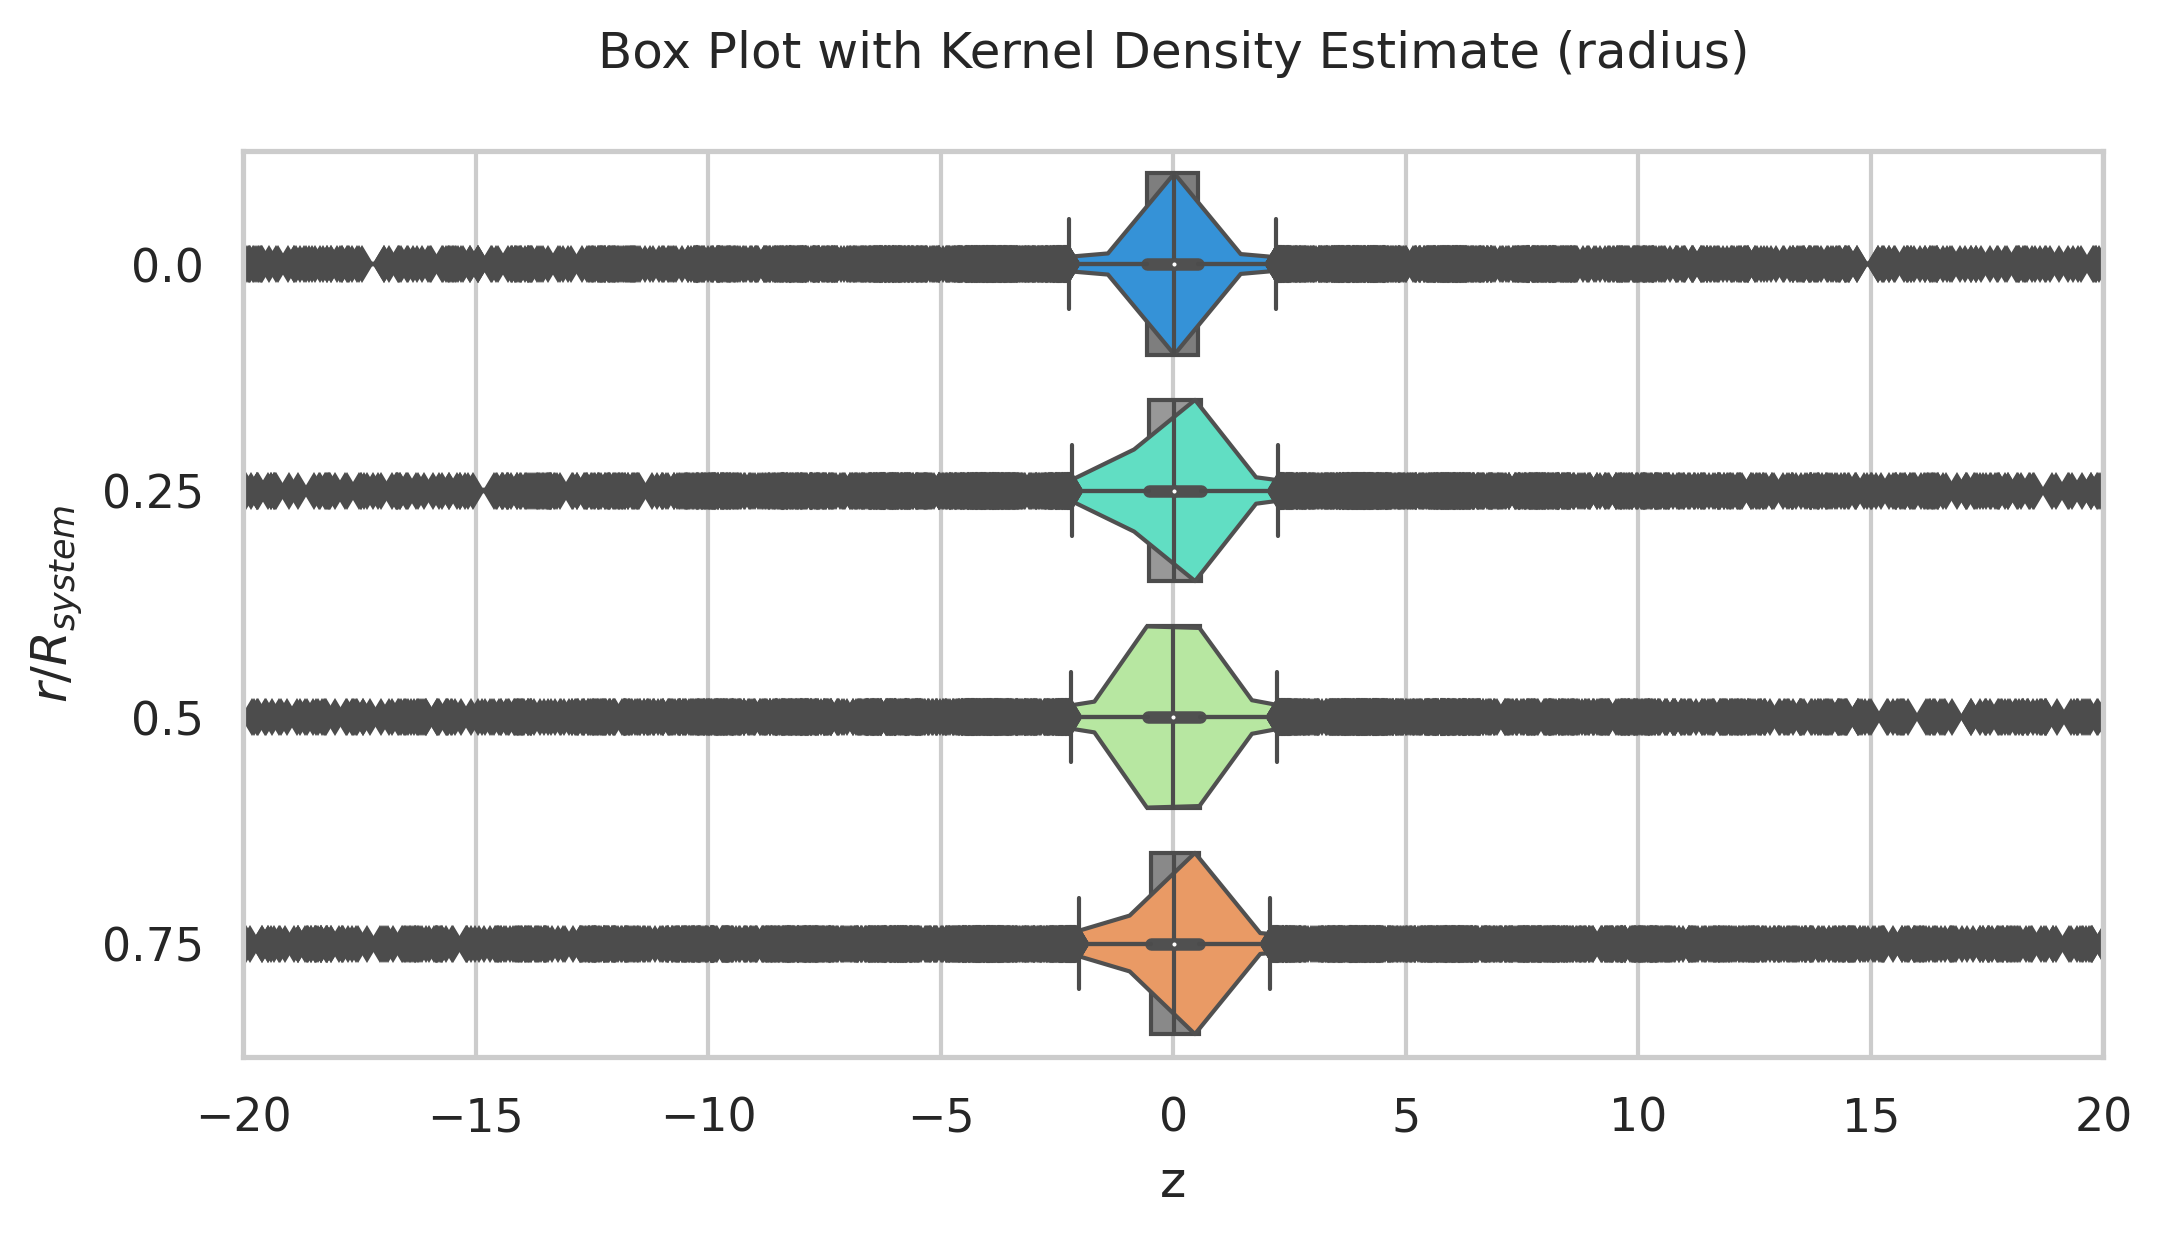

In [50]:
plt.figure(figsize=(8, 4))
sb.violinplot(data=df, x="z", y="r / R", orient="h", scale="width", 
              palette="rainbow", linewidth=1, bw=0.05)
sb.boxplot(data=df, x="z", y="r / R", orient="h", linewidth=1, saturation=0)
plt.title("Box Plot with Kernel Density Estimate (radius)")
plt.ylabel("$r / R_{system}$")
plt.xlim((-20, 20))

(-20.0, 20.0)

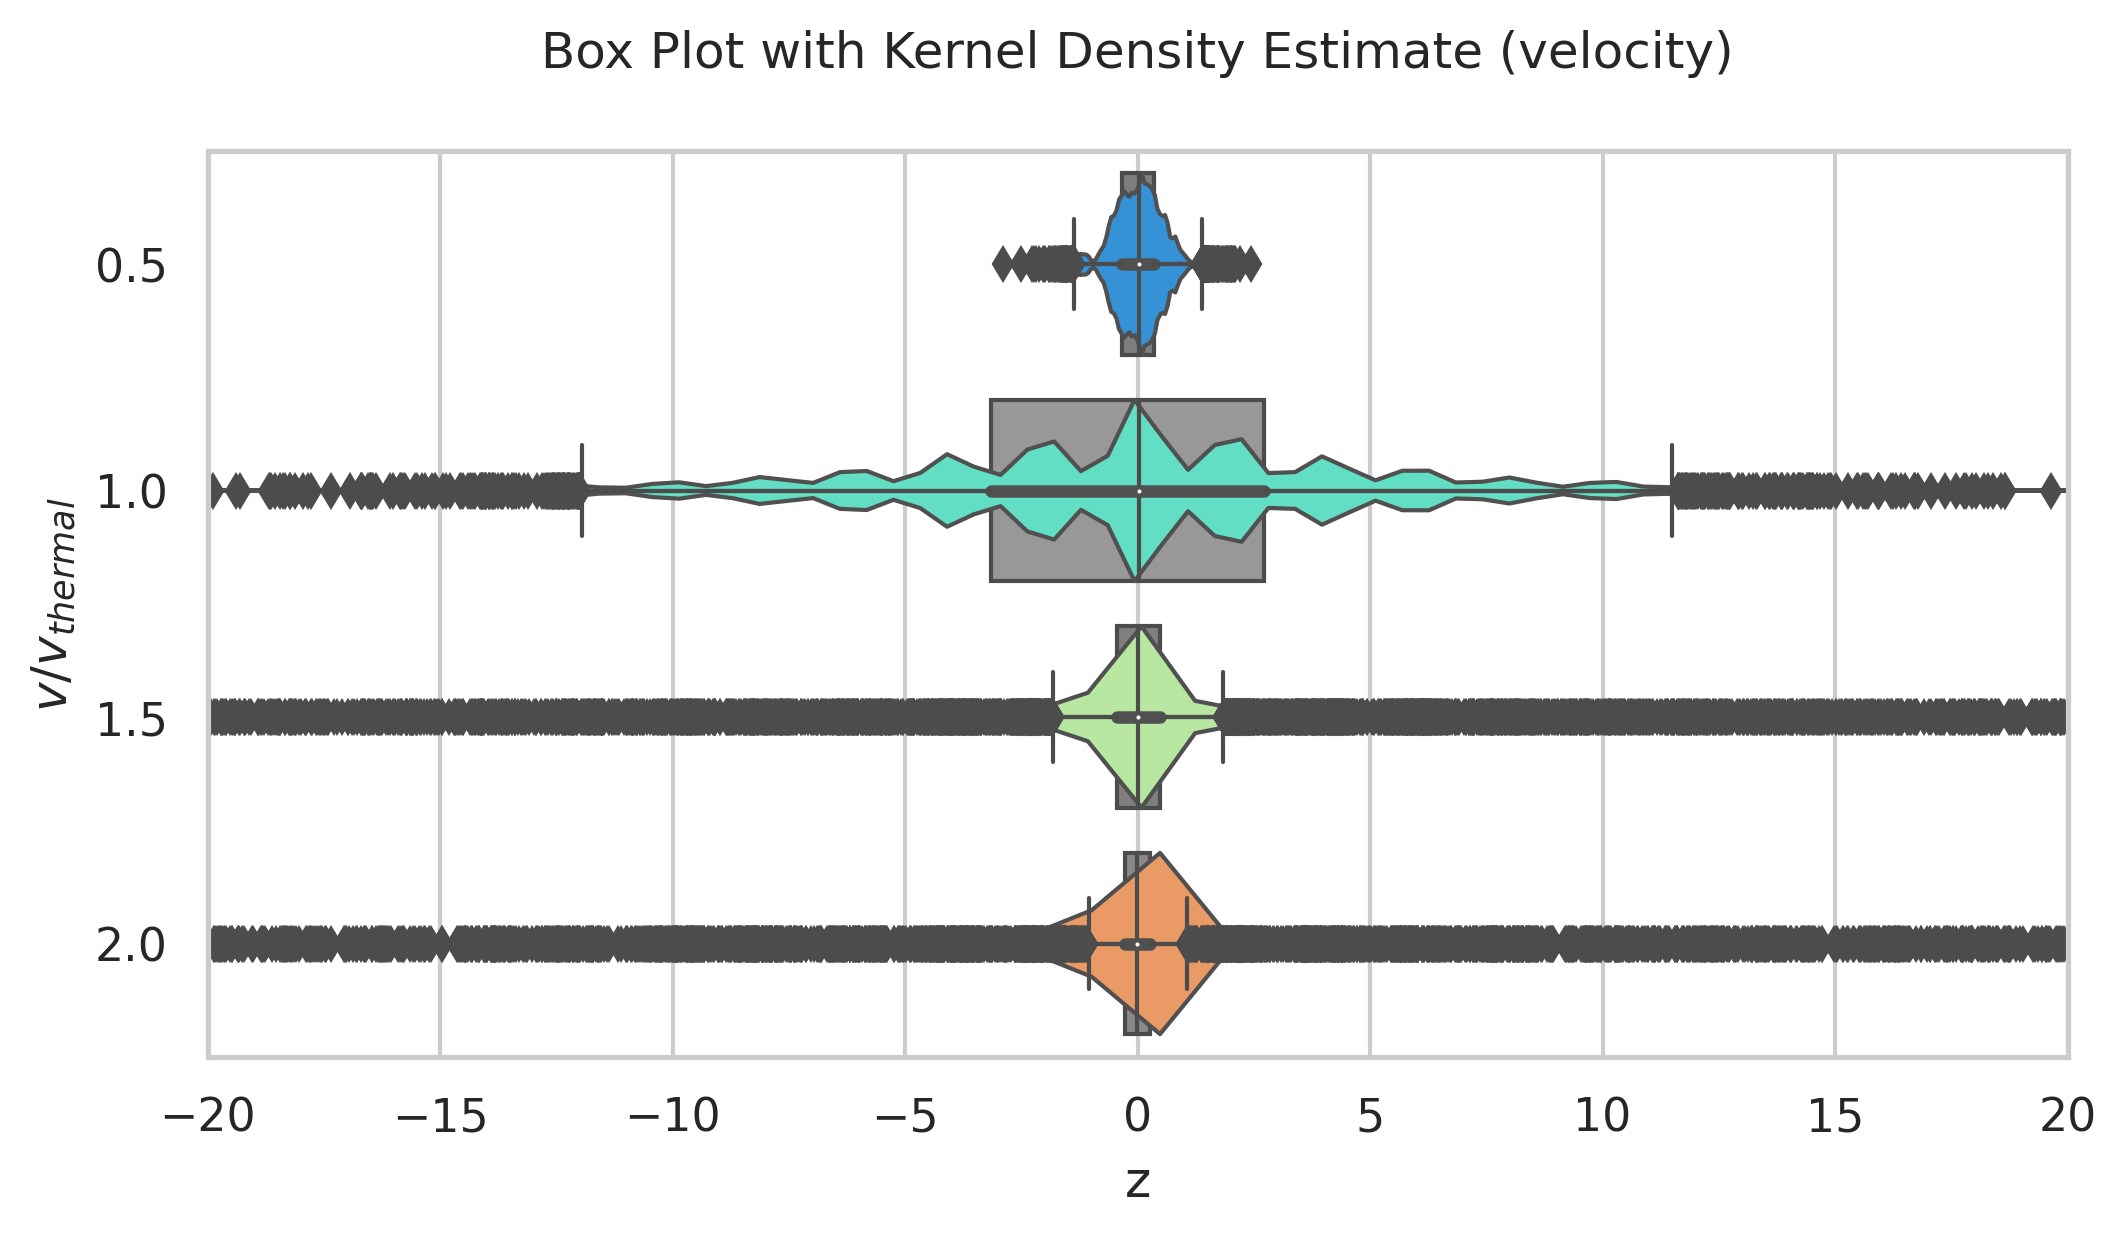

In [51]:
plt.figure(figsize=(8, 4))
sb.violinplot(data=df, x="z", y="v / v_thermal", orient="h", scale="width", 
              palette="rainbow", linewidth=1, bw=0.05)
sb.boxplot(data=df, x="z", y="v / v_thermal", orient="h", linewidth=1, saturation=0)
plt.title("Box Plot with Kernel Density Estimate (velocity)")
plt.ylabel("$v / v_{thermal}$")
plt.xlim((-20, 20))

(-20.0, 20.0)

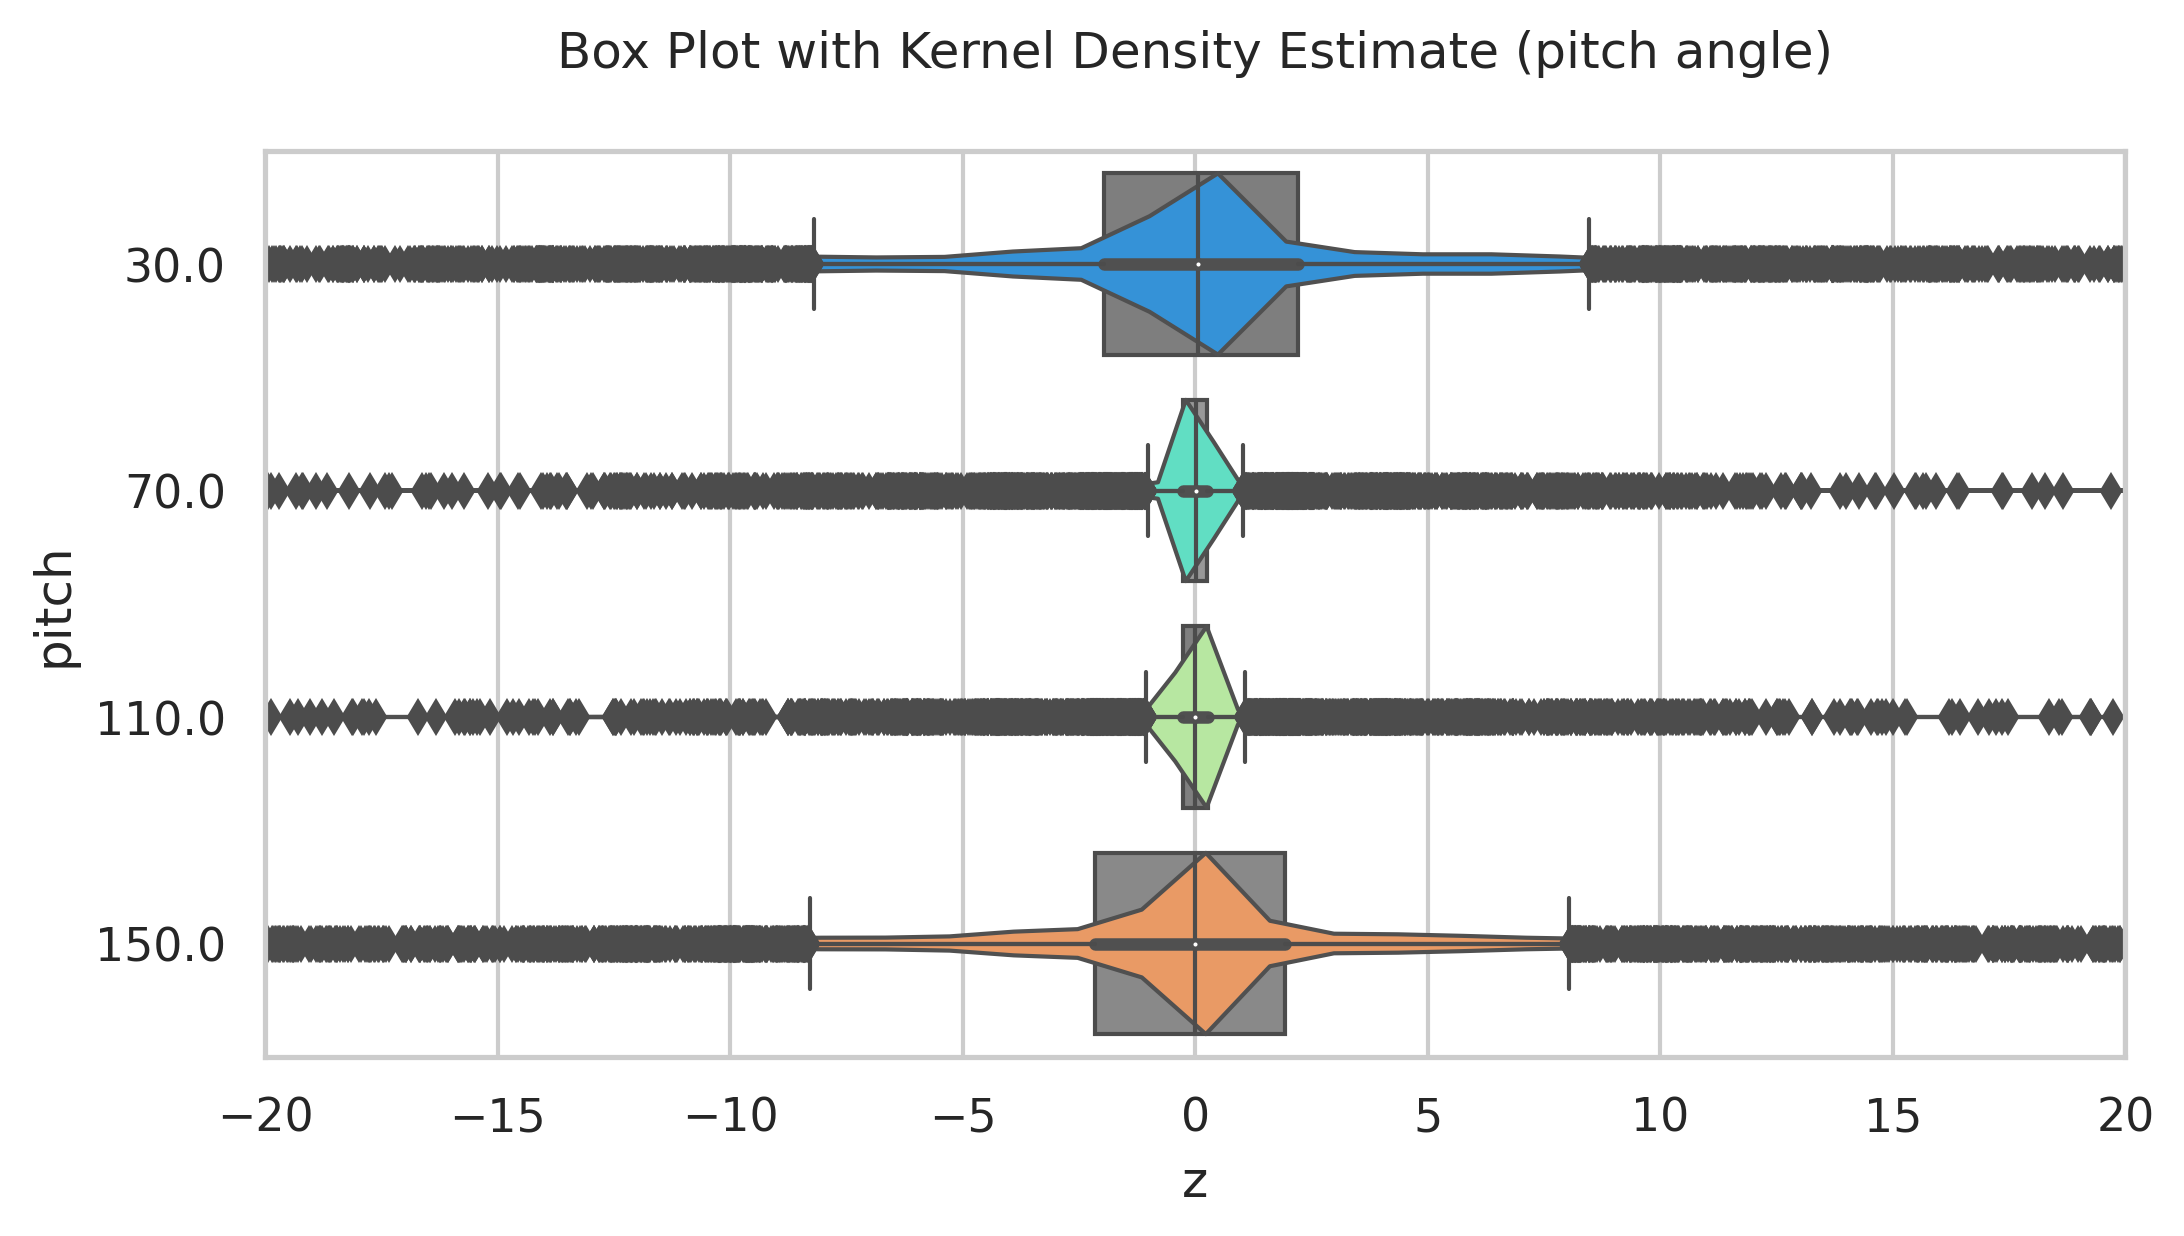

In [52]:
plt.figure(figsize=(8, 4))
sb.violinplot(data=df, x="z", y="pitch", orient="h", scale="width",
              palette="rainbow", linewidth=1, bw=0.05)
sb.boxplot(data=df, x="z", y="pitch", orient="h", linewidth=1, saturation=0)
plt.title("Box Plot with Kernel Density Estimate (pitch angle)")
plt.xlim((-20, 20))

(-20.0, 20.0)

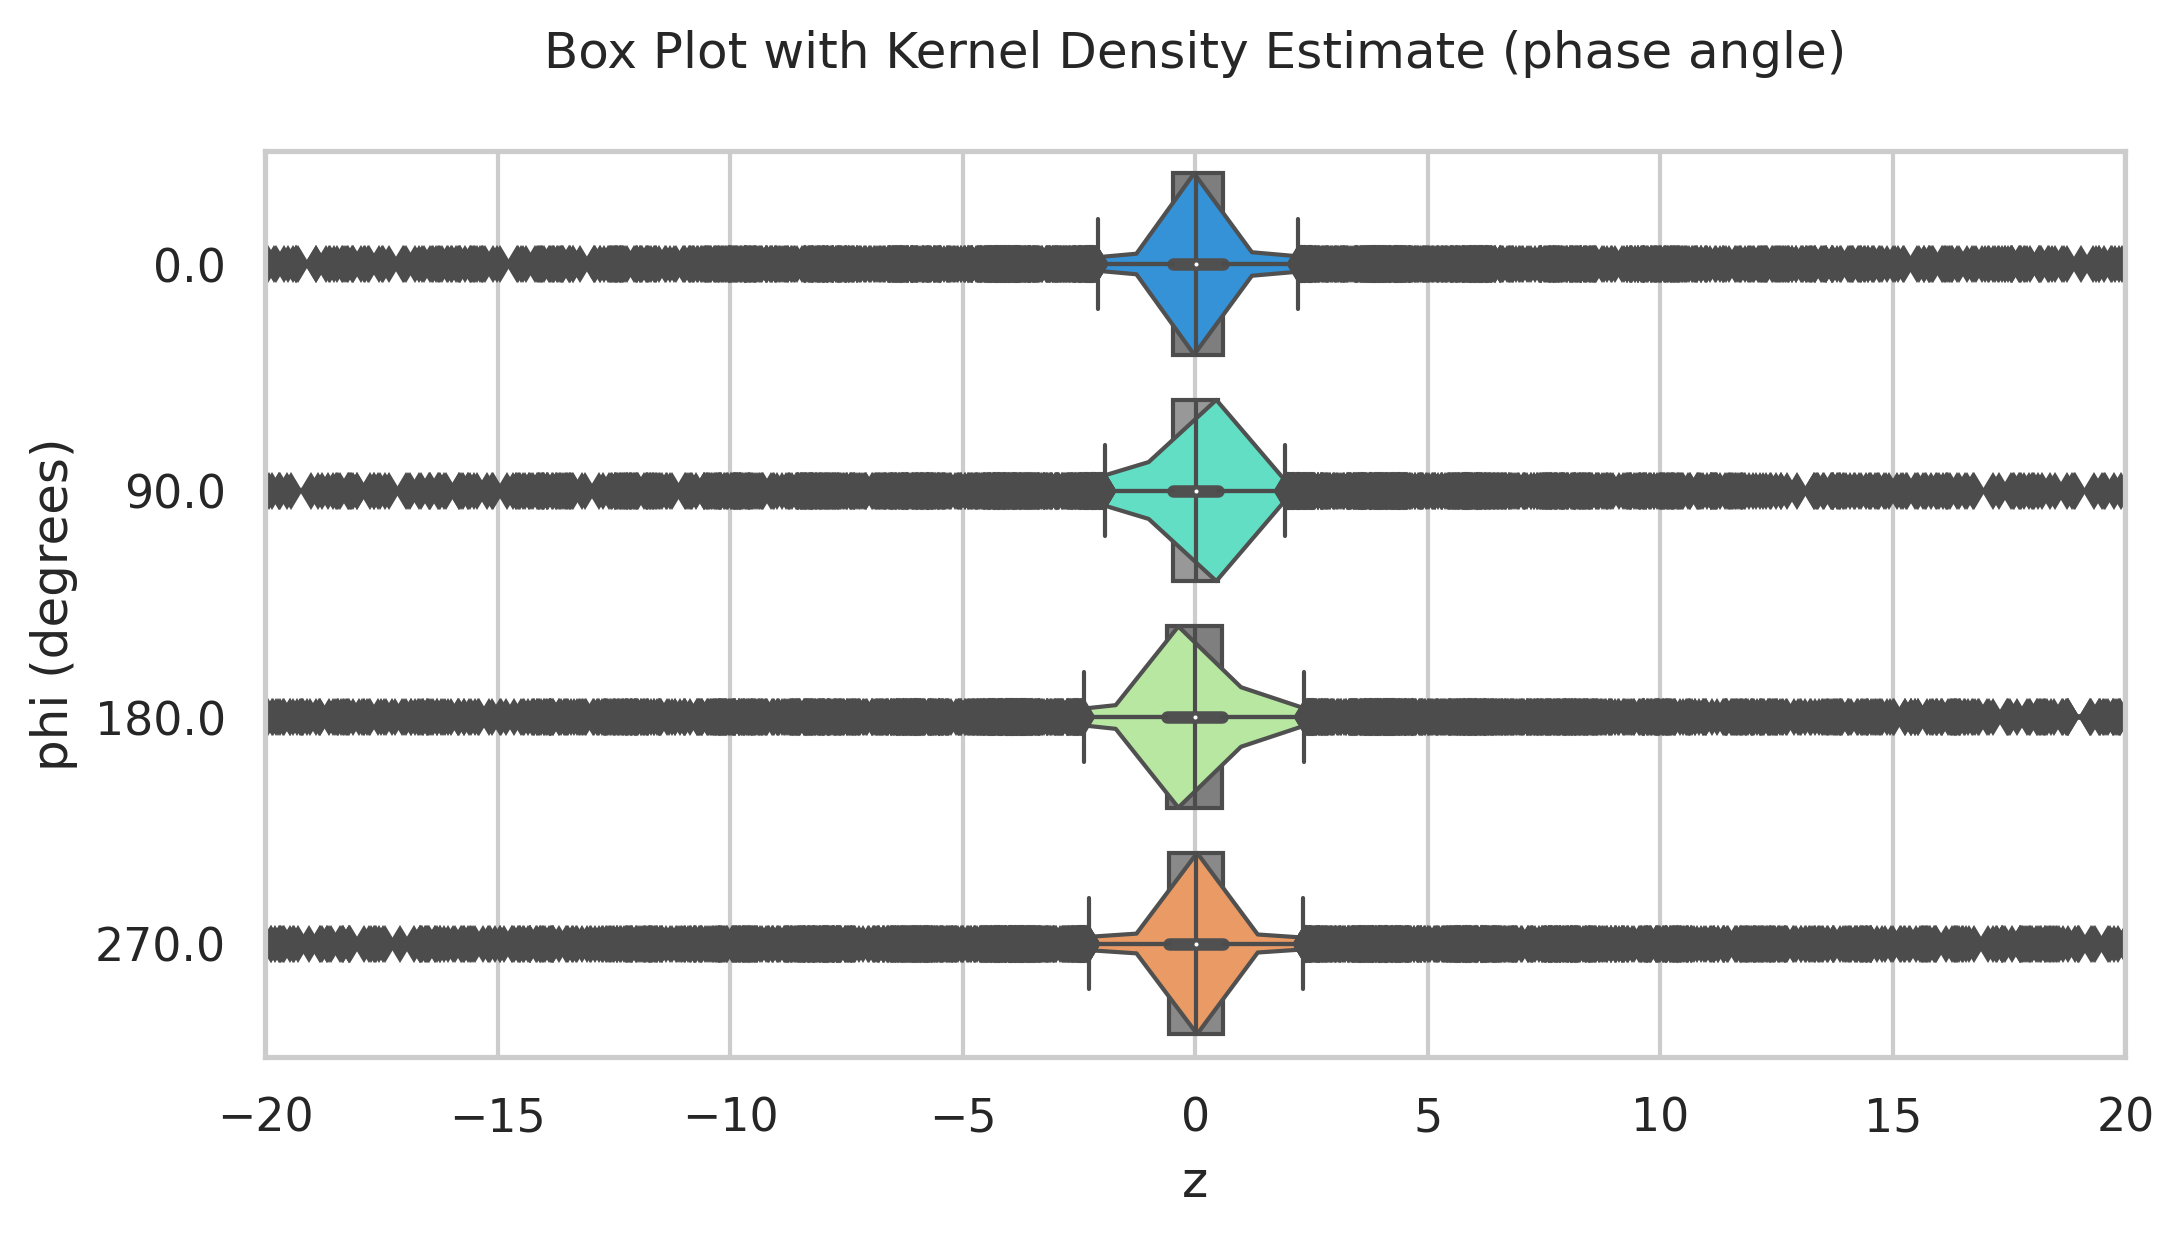

In [53]:
plt.figure(figsize=(8, 4))
sb.violinplot(data=df, x="z", y="phase", orient="h", scale="width",
              palette="rainbow", linewidth=1, bw=0.05, cut=True)
sb.boxplot(data=df, x="z", y="phase", orient="h", linewidth=1, saturation=0)
plt.title("Box Plot with Kernel Density Estimate (phase angle)")
plt.ylabel("phi (degrees)")
plt.xlim((-20, 20))

### numerical analysis

In [54]:
# statistics
df["z"].describe()

count    25600.000000
mean        -0.020143
std          8.312889
min        -74.805546
25%         -0.531738
50%          0.008211
75%          0.560244
max         68.429056
Name: z, dtype: float64

$$z_{final} < -d_-$$

In [55]:
z_neg = len(df[df["z"] < -params.loc["d_neg"][0]])
z_neg

5510

$$z_{final} > d_+$$

In [56]:
z_pos = len(df[df["z"] > params.loc["d_pos"][0]])
z_pos

5416

In [57]:
z_neg + z_pos

10926

In [58]:
z_neg / z_pos

1.0173559822747416

In [59]:
z_neg / len(df)

0.215234375